In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
from qiskit import *
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit_aer import AerSimulator
import math
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=589aba2f787576b42fcbf698de53acb4736f72b5225a7cfc113bd009e6f7fa03
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.3 MB/s eta 0:00:00


Creating Quantum Register and forming Measurement circuits for different bases

In [2]:
# Creating a 2 qubit Quantum Register

qr = QuantumRegister(2)
cr = ClassicalRegister(4)

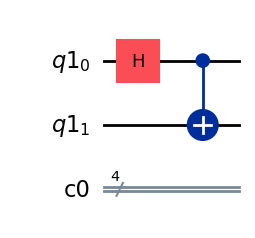

In [3]:
# Circuit for Creating a single entanglement pair

singlet = QuantumCircuit(qr,cr)
singlet.h(qr[0])
singlet.cx(qr[0],qr[1])
singlet.draw(output='mpl')

In [4]:
## Measurement Circuits for Alice

# Z Basis

msr_za = QuantumCircuit(qr,cr)
msr_za.measure(qr[0],cr[0])

# X Basis

msr_xa = QuantumCircuit(qr,cr)
msr_xa.h(qr[0])
msr_xa.measure(qr[0],cr[0])

# W Basis

msr_wa = QuantumCircuit(qr,cr)
msr_wa.s(qr[0])
msr_wa.h(qr[0])
msr_wa.t(qr[0])
msr_wa.h(qr[0])

msr_wa.measure(qr[0],cr[0])

In [5]:
## Measurement Circuits for Bob

# Z Basis

msr_zb = QuantumCircuit(qr,cr)
msr_zb.measure(qr[1],cr[1])

# W Basis

msr_wb = QuantumCircuit(qr,cr)
msr_wb.s(qr[1])
msr_wb.h(qr[1])
msr_wb.t(qr[1])
msr_wb.h(qr[1])

msr_wb.measure(qr[1],cr[1])

# V Basis

msr_vb = QuantumCircuit(qr,cr)
msr_vb.s(qr[1])
msr_vb.h(qr[1])
msr_vb.tdg(qr[1])
msr_vb.h(qr[1])

msr_vb.measure(qr[1],cr[1])

In [6]:
# Storing the measurement circuits in a list

# Alice
alice_msr = [msr_za,msr_xa,msr_wa]

# Bob
bob_msr = [msr_zb,msr_wb,msr_vb]

Random Basis selection for measurement

In [7]:
## Random Basis selection for measurement

singlet_number = 500

# Alice
alice_basis = []
for i in range(singlet_number):
  rand=random.randint(0,2)
  alice_basis.append(rand)

# Bob
bob_basis = []
for i in range(singlet_number):
  rand=random.randint(0,2)
  bob_basis.append(rand)

Simulation

In [8]:
## Creating a list of circuits

circuits=[]

for i in range(singlet_number):
  # Use compose() to combine the circuits
  circuit = singlet.compose(alice_msr[alice_basis[i]]).compose(bob_msr[bob_basis[i]])
  circuits.append(circuit)

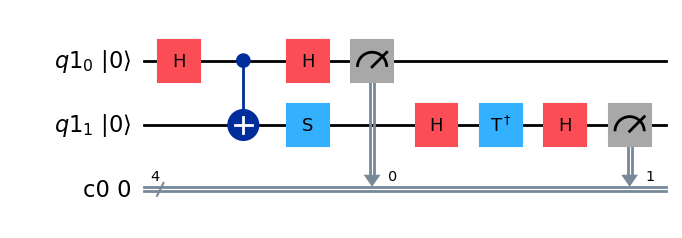

In [9]:
circuits[350].draw(output='mpl',initial_state = True)

In [10]:
simulator = AerSimulator()
results = []
for circuit in circuits:
  compiled_circuit = transpile(circuit, simulator)
  job = simulator.run(compiled_circuit, shots=1)
  result = job.result()
  counts = result.get_counts(circuit)
  results.append(counts)


Measurement Results

In [11]:
res = []
for counts in results:
  for key in counts:
    res.append(key)
print(res)

['0011', '0001', '0011', '0000', '0001', '0010', '0011', '0011', '0000', '0000', '0000', '0000', '0011', '0000', '0010', '0010', '0011', '0011', '0001', '0000', '0000', '0000', '0011', '0010', '0000', '0010', '0011', '0000', '0011', '0011', '0011', '0000', '0011', '0000', '0001', '0000', '0010', '0000', '0011', '0011', '0010', '0001', '0011', '0010', '0000', '0010', '0001', '0000', '0000', '0011', '0010', '0011', '0011', '0011', '0010', '0011', '0001', '0000', '0000', '0010', '0000', '0000', '0010', '0011', '0011', '0011', '0011', '0001', '0011', '0010', '0000', '0000', '0011', '0011', '0000', '0010', '0011', '0000', '0001', '0011', '0010', '0000', '0000', '0000', '0000', '0000', '0010', '0001', '0000', '0011', '0000', '0000', '0000', '0000', '0000', '0010', '0010', '0001', '0000', '0011', '0010', '0011', '0011', '0011', '0001', '0000', '0011', '0000', '0000', '0011', '0010', '0001', '0000', '0000', '0001', '0011', '0010', '0011', '0001', '0010', '0000', '0011', '0000', '0000', '0001',

In [12]:
alice_results = []
bob_results = []

for value in res:
  if value == '0000':
    alice_results.append(0)
    bob_results.append(0)
  elif value == '0011':
    alice_results.append(1)
    bob_results.append(1)
  elif value == '0010':
    alice_results.append(0)
    bob_results.append(1)
  elif value == '0001':
    alice_results.append(1)
    bob_results.append(0)
print(alice_results)
print(bob_results)


[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 

In [13]:
print("Length of alice's result: ",len(alice_results))
print("Length of Bob's result: ",len(bob_results))

Length of alice's result:  500
Length of Bob's result:  500


Ekert Key generation

In [16]:
# Ekert Key Generation

key_alice=[]
key_bob=[]
for i in range(singlet_number):
  if (alice_basis[i]==0 and bob_basis[i]==0) or (alice_basis[i]==2 and bob_basis[i]==1):
    key_alice.append(alice_results[i])
    key_bob.append(bob_results[i])

print("Alice key Length: ", len(key_alice))
print("Bob key Length: ", len(key_bob))

Alice key Length:  111
Bob key Length:  111


In [17]:
# Mismatch Count

key_length=len(key_alice)

mismatch_count=0
for i in range(key_length):
  if key_alice[i]!=key_bob[i]:
    mismatch_count+=1
print("Mismatch Count: ", mismatch_count)

Mismatch Count:  0


Functions for Chaos parameter generation

In [18]:
#  Function for converting binary key to decimal key

def binarykey_to_decimal(key_X, chunk_size):
  """
  Converts a binary key into a list of decimal values.

  Args:
    key_X: A list of binary bits.
    chunk_size: The size of each chunk.

  Returns:
    A list of decimal values.
  """
  decimal_values = []
  for i in range(0, len(key_X), chunk_size):
    chunk = key_X[i:i + chunk_size]
    decimal_value = int(''.join(str(bit) for bit in chunk), 2)
    decimal_values.append(decimal_value)
  return decimal_values

In [19]:
# Function for initial seed(x0)  Generation

def seed_x0(decimal_list):
  """
  Takes a list containing decimal values, extracts the first half,
  concatenates them into a string, and converts to a float value.

  Args:
    decimal_list: A list of decimal values.

  Returns:
    A float value.
  """
  # Take the first half of the list
  first_half = decimal_list[:len(decimal_list) // 2]

  # Concatenate all decimal values into a single string
  concatenated_string = ''.join(str(x) for x in first_half)

  # Convert the string to a float value
  float_value = float("0." + concatenated_string)

  return float_value

In [20]:
# Function for r_value  Generation

def r_value(decimal_list):
  """
   Takes a list containing decimal values, extracts the second half,
  concatenates them into a string, converts to a float, and concatenates
  with 3.99.

  Args:
    decimal_list: A list of decimal values.

  Returns:
    A float value.
  """
  # Take the second half of the list
  half_list = decimal_list[len(decimal_list)//2:]

  # Concatenate all decimal values into a single string
  concatenated_string = ''.join(str(x) for x in half_list)

  # Convert the string to a float value (after two spaces from decimal point)
  float_value = float("0.00" + concatenated_string)

  # Concatenate the float to 3.99
  final_value = 3.99 + float_value

  return final_value


Chaos function parameter generation

In [21]:
###  Chaos function parameter generation

##   Alice
# Decimal key Generation
decimal_key_alice = binarykey_to_decimal(key_alice, 4)
print("Decimal Key of Alice: ", decimal_key_alice)

# Initial seed(x0) generation
seedx0_alice = seed_x0(decimal_key_alice)
print("Initial Seed of Alice: ", seedx0_alice)

# r_value generation
r_value_alice = r_value(decimal_key_alice)
print("Initial r_value of Alice: ", r_value_alice)

##  Bob
# Decimal key Generation
decimal_key_bob= binarykey_to_decimal(key_bob, 4)
print("Decimal Key of Bob: ", decimal_key_bob)

# Initial seed(x0) generation
seedx0_bob = seed_x0(decimal_key_bob)
print("Initial Seed of Bob: ", seedx0_bob)

# Initial r_value generation
r_value_bob = r_value(decimal_key_bob)
print("Initial r_value of Bob: ", r_value_bob)

Decimal Key of Alice:  [2, 11, 10, 1, 1, 5, 6, 10, 9, 9, 1, 9, 12, 4, 4, 15, 11, 0, 8, 2, 8, 0, 10, 10, 6, 12, 6, 6]
Initial Seed of Alice:  0.2111011561099191
Initial r_value of Alice:  3.9941511082801013
Decimal Key of Bob:  [2, 11, 10, 1, 1, 5, 6, 10, 9, 9, 1, 9, 12, 4, 4, 15, 11, 0, 8, 2, 8, 0, 10, 10, 6, 12, 6, 6]
Initial Seed of Bob:  0.2111011561099191
Initial r_value of Bob:  3.9941511082801013


Logistic map and key stream generation functions

In [22]:
# Function to generate values for logistic map

def logistic_map(seed_X, r_value_X):
  """
  Calculates the logistic map value.

  Args:
    seed_X: Seed value.
    r_value_X: The r value.

  Returns:
    The logistic map value.
  """
  logistic_value = r_value_X * seed_X * (1 - seed_X)
  return logistic_value

In [23]:
# Function to generate key_stream using logistic map

def generate_key_stream(seedx0_X, r_value_X, length):
  """
  Generates a key stream using the logistic map function.

  Args:
    seedx0_X: Initial seed value.
    r_value_X: The r value for the logistic map.
    length: The desired length of the key stream.

  Returns:
    A list containing the key stream.
  """
  key_stream = []
  seed_i = seedx0_X
  for i in range(length):
    seed_i = logistic_map(seed_i, r_value_X)
    key_stream.append(int(seed_i*255))
  return key_stream


In [24]:
# Function to encrypt/decrypt image (this encrypt_image function can be used to both encrypt and decrypt)

def encrypt_image(image, key_stream):
  """
  Encrypts an image using a key stream.

  Args:
    image: The input image.
    key_stream: The key stream.

  Returns:
    The encrypted image.
  """
  # Create a deep copy of the image
  encrypted_image = image.copy()

  # Get the shape of the image
  height, width = image.shape

  # Perform XOR operation between each pixel value and the key stream
  index = 0
  for i in range(height):
    for j in range(width):
      encrypted_image[i, j] = encrypted_image[i, j] ^ key_stream[index % len(key_stream)]
      index += 1
  return encrypted_image

Image Read

In [25]:
# Reading the image and extracting its shape and other data

# Load the image
image_path = '/content/image.png'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Get the shape of the image
height, width = image.shape

print("Image shape:", image.shape)  # Output: (height, width)

Image shape: (256, 256)


Encryption

In [26]:
## Encryption code for Alice

# key_stream generation for alice
key_stream_alice = generate_key_stream(seedx0_alice, r_value_alice, height * width)
print("Key Stream of Alice: ", key_stream_alice)

# Encrypt the image using key_stream_alice
encrypted_image = encrypt_image(image, key_stream_alice)

Key Stream of Alice:  [169, 226, 100, 242, 46, 151, 245, 35, 122, 254, 3, 12, 46, 151, 245, 36, 124, 254, 2, 7, 30, 107, 248, 24, 90, 232, 81, 221, 116, 252, 8, 34, 119, 253, 5, 22, 82, 223, 111, 250, 16, 62, 189, 194, 183, 205, 158, 239, 58, 179, 212, 140, 252, 11, 43, 143, 250, 17, 66, 195, 182, 207, 154, 243, 44, 147, 248, 24, 89, 231, 85, 226, 101, 244, 41, 139, 252, 10, 40, 136, 253, 6, 23, 85, 227, 98, 241, 50, 162, 235, 71, 205, 158, 239, 58, 179, 212, 140, 251, 12, 48, 156, 241, 50, 160, 237, 66, 196, 180, 210, 147, 248, 26, 94, 237, 65, 193, 185, 201, 168, 227, 97, 240, 55, 174, 220, 119, 253, 5, 20, 74, 210, 145, 249, 21, 77, 215, 132, 254, 2, 11, 42, 141, 251, 13, 52, 166, 230, 89, 231, 85, 226, 100, 243, 43, 144, 250, 19, 70, 203, 163, 234, 75, 211, 143, 250, 17, 66, 196, 179, 212, 141, 251, 13, 49, 159, 238, 60, 183, 205, 159, 238, 62, 188, 197, 178, 213, 139, 252, 9, 38, 129, 254, 1, 6, 25, 92, 235, 71, 205, 158, 239, 59, 182, 207, 154, 243, 44, 147, 248, 24, 89, 232, 81,

Decryption

In [27]:
## Decryption code for Bob

# Extracting shape data from encrypted_image
height, width = encrypted_image.shape

# key_stream generation for bob
key_stream_bob = generate_key_stream(seedx0_bob, r_value_bob, height * width)
print("Key Stream of Bob: ", key_stream_bob)

# Decrypt the image using key_stream_bob
decrypted_image = encrypt_image(encrypted_image, key_stream_bob)

Key Stream of Bob:  [169, 226, 100, 242, 46, 151, 245, 35, 122, 254, 3, 12, 46, 151, 245, 36, 124, 254, 2, 7, 30, 107, 248, 24, 90, 232, 81, 221, 116, 252, 8, 34, 119, 253, 5, 22, 82, 223, 111, 250, 16, 62, 189, 194, 183, 205, 158, 239, 58, 179, 212, 140, 252, 11, 43, 143, 250, 17, 66, 195, 182, 207, 154, 243, 44, 147, 248, 24, 89, 231, 85, 226, 101, 244, 41, 139, 252, 10, 40, 136, 253, 6, 23, 85, 227, 98, 241, 50, 162, 235, 71, 205, 158, 239, 58, 179, 212, 140, 251, 12, 48, 156, 241, 50, 160, 237, 66, 196, 180, 210, 147, 248, 26, 94, 237, 65, 193, 185, 201, 168, 227, 97, 240, 55, 174, 220, 119, 253, 5, 20, 74, 210, 145, 249, 21, 77, 215, 132, 254, 2, 11, 42, 141, 251, 13, 52, 166, 230, 89, 231, 85, 226, 100, 243, 43, 144, 250, 19, 70, 203, 163, 234, 75, 211, 143, 250, 17, 66, 196, 179, 212, 141, 251, 13, 49, 159, 238, 60, 183, 205, 159, 238, 62, 188, 197, 178, 213, 139, 252, 9, 38, 129, 254, 1, 6, 25, 92, 235, 71, 205, 158, 239, 59, 182, 207, 154, 243, 44, 147, 248, 24, 89, 232, 81, 2

Result

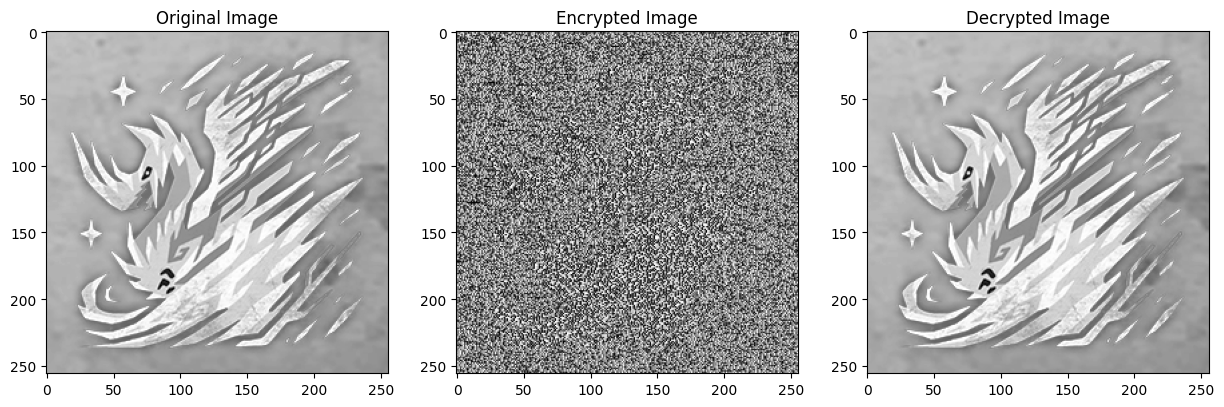

In [28]:
# Show the original image (grayscale), encrypted image and decrypted image

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(encrypted_image, cmap='gray')
axs[1].set_title('Encrypted Image')

axs[2].imshow(decrypted_image, cmap='gray')
axs[2].set_title('Decrypted Image')

plt.show()

Checking if changes to ekert key effect final result

key_bob[0]:  0


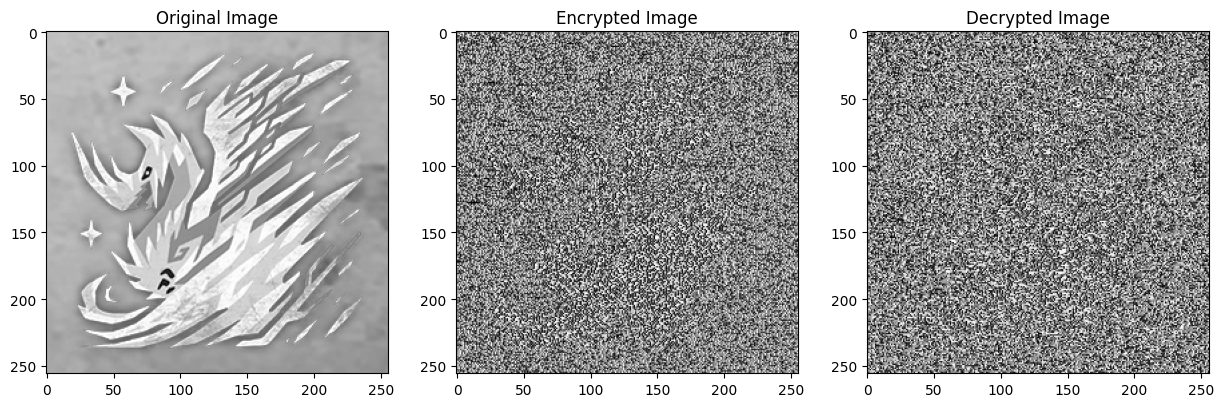

In [29]:
## Change one bit from key_bob (derived from bob_result) and see what happens to the decryprted_image

# First value of the key_bob list
print("key_bob[0]: ", key_bob[0])

# Change the value
if key_bob[0] == 0:
  key_bob[0] = 1
else:
  key_bob[0] = 0

# Decimal key Generation
decimal_key_bob= binarykey_to_decimal(key_bob, 4)

# Initial seed(x0) generation
seedx0_bob = seed_x0(decimal_key_bob)

# Initial r_value generation
r_value_bob = r_value(decimal_key_bob)

# key_stream generation for bob
key_stream_bob = generate_key_stream(seedx0_bob, r_value_bob, height * width)

# Decrypt the image using key_stream_bob
decrypted_image = encrypt_image(encrypted_image, key_stream_bob)

# Show the original image (grayscale), encrypted image and decrypted image

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(encrypted_image, cmap='gray')
axs[1].set_title('Encrypted Image')

axs[2].imshow(decrypted_image, cmap='gray')
axs[2].set_title('Decrypted Image')

plt.show()

Result Analysis

In [30]:
# Entropy Calculation

def shannon_entropy(image):
  """
  Calculates the Shannon entropy of an image.

  Args:
    image: The input image.

  Returns:
    The Shannon entropy of the image.
  """
  # Flatten the image into a 1D array
  pixels = image.flatten()

  # Calculate the probability of each pixel value
  unique, counts = np.unique(pixels, return_counts=True)
  probabilities = counts / len(pixels)

  # Calculate the entropy
  entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add a small value to avoid log(0)

  return entropy

# Calculate the entropy of the original and encrypted images
original_entropy = shannon_entropy(image)
encrypted_entropy = shannon_entropy(encrypted_image)

print("Shannon entropy of the original image:", original_entropy)
print("Shannon entropy of the encrypted image:", encrypted_entropy)


Shannon entropy of the original image: 6.900622236914371
Shannon entropy of the encrypted image: 7.982208004337126


In [31]:
# Normalized pixel change rate (NCPR), Unified average changing intensity (UACI) and Correlation between original and encrypted image

def normalized_pixel_change_rate(original_image, encrypted_image):
  """
  Calculates the normalized pixel change rate between two images.

  Args:
    original_image: The original image.
    encrypted_image: The encrypted image.

  Returns:
    The normalized pixel change rate.
  """
  # Calculate the difference between the two images
  diff = np.abs(original_image.astype(float) - encrypted_image.astype(float))

  # Calculate the maximum possible difference
  max_diff = np.max(original_image) - np.min(original_image)

  # Normalize the difference
  normalized_diff = diff / max_diff

  # Calculate the average normalized difference
  normalized_pixel_change_rate = np.mean(normalized_diff)

  return normalized_pixel_change_rate

def unified_average_changing_intensity(original_image, encrypted_image):
  """
  Calculates the unified average changing intensity between two images.

  Args:
    original_image: The original image.
    encrypted_image: The encrypted image.

  Returns:
    The unified average changing intensity.
  """
  # Calculate the difference between the two images
  diff = np.abs(original_image.astype(float) - encrypted_image.astype(float))

  # Calculate the average difference
  average_diff = np.mean(diff)

  return average_diff

def correlation(original_image, encrypted_image):
  """
  Calculates the correlation between two images.

  Args:
    original_image: The original image.
    encrypted_image: The encrypted image.

  Returns:
    The correlation between the two images.
  """
  # Flatten the images
  original_image_flat = original_image.flatten()
  encrypted_image_flat = encrypted_image.flatten()

  # Calculate the correlation
  correlation = np.corrcoef(original_image_flat, encrypted_image_flat)[0, 1]

  return correlation

# Calculate the metrics
npcr = normalized_pixel_change_rate(image, encrypted_image)
uaci = unified_average_changing_intensity(image, encrypted_image)
corr = correlation(image, encrypted_image)

print("Normalized Pixel Change Rate (NPCR):", npcr)
print("Unified Average Changing Intensity (UACI):", uaci)
print("Correlation:", corr)

Normalized Pixel Change Rate (NPCR): 0.2903201832490809
Unified Average Changing Intensity (UACI): 74.03164672851562
Correlation: -0.02968858774535119
